# SEC TEXT: NLP

## A codebase to allow for search and additional Natural Language Processing work by analysts and developers for SEC 10K and 10Q filings.

The product is built in four files.

The first 2 are written in R and use the edgarWebR library from https://mwaldstein.github.io/edgarWebR/, a well-maintained and popular library for pulling SEC documents and slicing the SEC's unique XBRL approach into readable sections.

sec_nlp_getter.R reads a list of tickers from a local csv file, column named Symbol, and 
a) retrieves all filings from the SEC for that symbol,
b) saves the base HTML document in a file tokenized (split) by sentences
c) parses the base document into MDNA and Risk Factor sections
d) creates a local file filing_index.csv which stores the location of each document for each ticker.

sec_R_utils.R is the utility file for sec_nlp_getter.

The second 2 files are written in Python and use NLTK and pattern libraries to apply sentiment analysis to the extracted documents.

(sample_workflow.py is a sample file to show the various combinations available to the SECTextNLP class)

sec_text_nlp.py contains the SECTextNLP class.

sec_nlp_utils.py is the utility file for sec_text_nlp.py.

## The following workflow is an example of the use of the SECTextNLP class.



Setup: download git into a directory, unzip the archive.zip file in the git directory.
Import py file as below.

Instantiate an SECTextNLP object with a ticker.
Select ticker, period date, form name, and type from the df_file_index object to see what documents are available.


In [1]:

from sec_text_nlp import *

stn = SECTextNLP("AAPL")
stn.df_file_index[['ticker','period_date','form_name','type']].head()


,ticker,period_date,form_name,type
139,AAPL,2020-06-27T04:00:00Z,Quarterly report [Sections 13 or 15(d)],10-Q
140,AAPL,2020-03-28T04:00:00Z,Quarterly report [Sections 13 or 15(d)],10-Q
141,AAPL,2019-12-28T05:00:00Z,Quarterly report [Sections 13 or 15(d)],10-Q
142,AAPL,2019-09-28T04:00:00Z,"Annual report [Section 13 and 15(d), not S-K I...",10-K
143,AAPL,2019-06-29T04:00:00Z,Quarterly report [Sections 13 or 15(d)],10-Q



Get the fully concatenated text of the base document
Includes the file name, and href is the reference key for use in other joins.


In [2]:

stn.df_text.head()


,part.name,item.name,sentence_text,file,href
0,NaN,NaN,united states securities and exchange commissi...,aapl-20200627_sentences.csv,https://www.sec.gov/Archives/edgar/data/320193...
1,NaN,NaN,20549 form 10-q (mark one) ☒ quarterly repor...,aapl-20200627_sentences.csv,https://www.sec.gov/Archives/edgar/data/320193...
2,NaN,NaN,commission file number: 001-36743 apple inc.,aapl-20200627_sentences.csv,https://www.sec.gov/Archives/edgar/data/320193...
3,NaN,NaN,(exact name of registrant as specified in its ...,aapl-20200627_sentences.csv,https://www.sec.gov/Archives/edgar/data/320193...
4,NaN,NaN,employer identification no.),aapl-20200627_sentences.csv,https://www.sec.gov/Archives/edgar/data/320193...



For more reference information, join with the file index on the href key. 
Now you can see filing_date.



In [3]:

pd.merge(stn.df_text,stn.df_file_index,how = 'inner',left_on='href',right_on='href')[['ticker','filing_date','sentence_text']].head()
#add filing type


,ticker,filing_date,sentence_text
0,AAPL,2020-07-31T04:00:00Z,united states securities and exchange commissi...
1,AAPL,2020-07-31T04:00:00Z,20549 form 10-q (mark one) ☒ quarterly repor...
2,AAPL,2020-07-31T04:00:00Z,commission file number: 001-36743 apple inc.
3,AAPL,2020-07-31T04:00:00Z,(exact name of registrant as specified in its ...
4,AAPL,2020-07-31T04:00:00Z,employer identification no.)



Or, if you only want Management Discussion and Analysis:
Join with the df_mdna object instead of df_text.


In [4]:

pd.merge(stn.df_mdna,stn.df_file_index,how = 'inner',left_on='href',right_on='href')[['ticker','filing_date','sentence_text']].head()


,ticker,filing_date,sentence_text
0,AAPL,2020-07-31T04:00:00Z,item 2.
1,AAPL,2020-07-31T04:00:00Z,management's discussion and analysis of financ...
2,AAPL,2020-07-31T04:00:00Z,forward-looking statements provide current exp...
3,AAPL,2020-07-31T04:00:00Z,"for example, statements in this form 10-q rega..."
4,AAPL,2020-07-31T04:00:00Z,forward-looking statements can also be identif...



Pass in a topic, and get noun phrases around that topic. 
Example: Get business segments.


In [5]:

stn.get_noun_phrases_around_topic(BUSINESS_SEGMENT_LIST)


['americas segment',
 'asia pacific',
 'asia pacific segment',
 'china segment',
 'distribution partners',
 'europe segment',
 'geographic segment',
 'hong kong',
 'retail stores',
 'software products']


Same approach, get products.


In [6]:

stn.get_noun_phrases_around_topic(PRODUCTS_LIST,nrows=2)


['app store',
 'app store®',
 'apple music',
 'apple music®',
 'apple pay',
 'apple pay®',
 'apple tv',
 'apple tv®',
 'apple watch®',
 'book store',
 'delivers digital content',
 'digital content',
 'icloud backup',
 'icloud drive®',
 'icloud icloud',
 'icloud keychain®',
 'icloud photos',
 'icloud services',
 'ios devices',
 'itunes store',
 'itunes store®',
 'mac app store',
 'multiple ios devices',
 'personal computers',
 'professional software applications',
 'stores music',
 'support offerings',
 'support options',
 'tv app store']


Or just get a list of all trademark items:


In [7]:

stn.get_words_with_trademark(stn.df_mdna)


['bar™',
 'mac®',
 'ipad®',
 'tvos®',
 'ipados®',
 'watchos®',
 'mini®',
 'store™',
 'x®',
 'card™',
 'macos™',
 'tv®',
 'applecare®',
 'beats®',
 'music®',
 'pro®',
 'watch®',
 'pencil®',
 'air®',
 'pay®',
 'arcade™',
 'ipados™',
 'homepod™',
 'macos®',
 'iphone®',
 'touch®',
 'folio™',
 'icloud®',
 'ipod®',
 'macbook®',
 'imac®',
 'store®',
 'airpods™',
 'pro™',
 'retina®',
 'tvos™']


Pair keyword search list with SENTIMENT ...
Using NLTK sentiment analyzer
'MACRO' is the column name of the new dataframe


In [8]:

stn.match_keywords(stn.NLTK_sentiment(stn.df_mdna),GLOBAL_SEARCH_LIST,'MACRO')


,part.name,item.name,sentence_text,section,file,href,neg,neu,pos,compound,MACRO,MACRO_number
0,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,item 2.,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,NaN,NaN
1,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,management's discussion and analysis of financ...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.173,0.767,0.060,-0.4767,NaN,NaN
2,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,forward-looking statements provide current exp...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.884,0.116,0.2732,NaN,NaN
3,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,"for example, statements in this form 10-q rega...",discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,['covid'],1.0
4,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,forward-looking statements can also be identif...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
267,PART II,Item 7. Management's Discussion and Analysis o...,"in the opinion of management, there was not at...",discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.251,0.582,0.167,-0.3182,NaN,NaN
268,PART II,Item 7. Management's Discussion and Analysis o...,"however, the outcome of legal proceedings and ...",discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.189,0.551,0.260,-0.0258,NaN,NaN
269,PART II,Item 7. Management's Discussion and Analysis o...,"therefore, although management considers the l...",discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.104,0.765,0.131,-0.0258,NaN,NaN
270,PART II,Item 7. Management's Discussion and Analysis o...,apple inc.,discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,NaN,NaN



Get trademark list, and get the sentiment for each word from the MDNA text.


In [9]:

list_trademarks = stn.get_words_with_trademark(stn.df_mdna)
df = stn.match_keywords(stn.NLTK_sentiment(stn.df_mdna),list_trademarks,'trademarks')
df.dropna()


,part.name,item.name,sentence_text,section,file,href,neg,neu,pos,compound,MACRO,MACRO_number,trademarks,trademarks_number
22,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,the covid-19 pandemic has significantly curtai...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.864,0.136,0.2960,['china'],1.0,['store®'],1.0
25,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,the company is working on safely re-opening it...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,['china'],1.0,"['pro®', 'pro™']",2.0
27,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,the most pronounced impact occurred in april 2...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.142,0.651,0.207,0.4019,['china'],1.0,"['pro®', 'air®']",2.0
28,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,the full extent of the future impact of the co...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.851,0.149,0.2732,['china'],1.0,"['applecare®', 'store®']",2.0
32,PART I - FINANCIAL INFORMATION,Item 2. Management's Discussion and Analysis o...,third quarter fiscal 2020 highlights total net...,discussion,aapl-20200627_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,['china'],1.0,['card™'],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,PART II,Item 7. Management's Discussion and Analysis o...,the year-over-year growth in mac net sales and...,discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.773,0.227,0.5719,['china'],1.0,['beats®'],1.0
51,PART II,Item 7. Management's Discussion and Analysis o...,mac net sales and unit sales increased in all ...,discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.811,0.189,0.2732,['china'],1.0,['pro®'],1.0
52,PART II,Item 7. Management's Discussion and Analysis o...,mac asps decreased during 2014 compared to 201...,discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,0.896,0.104,0.2732,['china'],1.0,['applecare®'],1.0
53,PART II,Item 7. Management's Discussion and Analysis o...,apple inc.,discussion,d17062d10k_mdna.csv,https://www.sec.gov/Archives/edgar/data/320193...,0.000,1.000,0.000,0.0000,['china'],1.0,['beats®'],1.0



Follow the same process, but use the pattern library sentiment analyzer.


In [10]:

list_trademarks = stn.get_words_with_trademark(stn.df_mdna)
df = stn.match_keywords(stn.pattern_sentiment(stn.df_mdna),list_trademarks,'trademarks')
df = df.dropna()[['href','sentence_text','pattern_sentiment','pattern_subjectivity','trademarks','trademarks_number']]
df

,href,sentence_text,pattern_sentiment,pattern_subjectivity,trademarks,trademarks_number
22,https://www.sec.gov/Archives/edgar/data/320193...,the covid-19 pandemic has significantly curtai...,-0.200000,0.300000,['store®'],1.0
25,https://www.sec.gov/Archives/edgar/data/320193...,the company is working on safely re-opening it...,0.000000,0.000000,"['pro®', 'pro™']",2.0
27,https://www.sec.gov/Archives/edgar/data/320193...,the most pronounced impact occurred in april 2...,0.102778,0.369444,"['pro®', 'air®']",2.0
28,https://www.sec.gov/Archives/edgar/data/320193...,the full extent of the future impact of the co...,-0.062500,0.187500,"['applecare®', 'store®']",2.0
32,https://www.sec.gov/Archives/edgar/data/320193...,third quarter fiscal 2020 highlights total net...,0.000000,0.000000,['card™'],1.0
...,...,...,...,...,...,...
50,https://www.sec.gov/Archives/edgar/data/320193...,the year-over-year growth in mac net sales and...,0.200000,0.250000,['beats®'],1.0
51,https://www.sec.gov/Archives/edgar/data/320193...,mac net sales and unit sales increased in all ...,0.000000,0.000000,['pro®'],1.0
52,https://www.sec.gov/Archives/edgar/data/320193...,mac asps decreased during 2014 compared to 201...,-0.103571,0.548810,['applecare®'],1.0
53,https://www.sec.gov/Archives/edgar/data/320193...,apple inc.,0.000000,0.000000,['beats®'],1.0


Lastly, read from a list of pre-extracted csv files.
global_macro = ['covid',
                    'recession',
                    'global',
                    'virus',
                    'coronavirus',
                    'china',
                    'economy',
                    'gdp']
 
 products_sentiment
 segments_sentiment
 trademarks_sentiment
 
 using the 

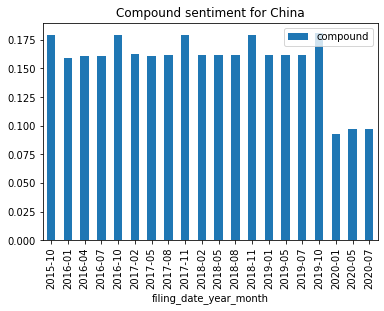

In [11]:
df = stn.read_from_csv(csv_file_name='global_macro')
df = df.loc[df['global_macro_long']=='china']
df = stn.year_month(df,'filing_date')
df = df.groupby('filing_date_year_month').mean().reset_index()
df.plot(kind='bar',x='filing_date_year_month',y='compound',title='Compound sentiment for China')
